In [24]:
using Turing, Distributions, Plots, StatsPlots
using Gen

```JavaScript
var twoHeads = Infer({
  model() {
    var a = flip(0.5);
    var b = flip(0.5);
    var c = flip(0.5);
    condition(a + b + c === 2);
    return a;
  }
});
```

In [17]:
@model function twoHeads(obs)
    a ~ Bernoulli(0.5)
    b ~ Bernoulli(0.5)
    c ~ Bernoulli(0.5)
    obs ~ Normal(a + b + c, 0.001)
end

twoHeads (generic function with 1 method)

In [18]:
chain = sample(twoHeads(2), MH(), 1000)

Chains MCMC chain (1000×4×1 Array{Float64, 3}):

Start time        = 2021-07-06T11:58:34.656
Stop time         = 2021-07-06T11:58:35.206
Wall duration     = 0.55 seconds
Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
parameters        = a, b, c
internals         = lp

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

           a    0.6760    0.4682     0.0148    0.0426   247.3085    1.0134     ⋯
           b    0.6430    0.4794     0.0152    0.0242   269.4792    1.0043     ⋯
           c    0.6810    0.4663     0.0147    0.0323   288.2762    1.0010     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           a    0.0000    0.0000    

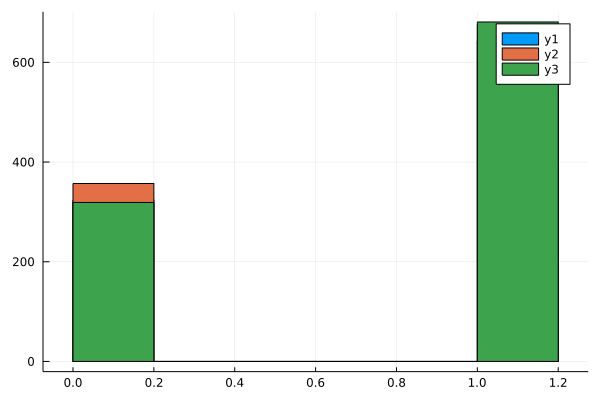

In [19]:
histogram(chain[:a])
histogram!(chain[:b])
histogram!(chain[:c])

In [20]:
as = chain[:a];

In [21]:
sum(as)/length(as)

0.676

In [23]:
logpdf(Normal(3, 0.01), 2)

-4996.313768347217

In [109]:
@gen function twoHeadsGen()
    logodds = @trace(normal(0, 1), :p)
    p = 1 / (1 + exp(-logodds))
    a = @trace(bernoulli(p), :a)
    b = @trace(bernoulli(0.5), :b)
    c = @trace(bernoulli(0.5), :c)
    obs = @trace(normal(a + b + c, 0.1), :obs)
end;

In [124]:
observations = Gen.choicemap()
observations[:obs] = 2
observations[:p] = 0.8
(trace, weight) = Gen.generate(twoHeadsGen, (), observations);

In [111]:
get_choices(trace)

│
├── :a : false
│
├── :b : false
│
├── :p : -1.6132916245033901
│
├── :obs : 2.0
│
└── :c : false


In [125]:
as = []
bs = []
ps = []
for i = 1:1000
    # trace, = Gen.hmc(trace, select(:p))
    trace, = Gen.mh(trace, select(:a, :b, :c))
    push!(as, trace[:a])
    push!(bs, trace[:b])
    push!(ps, trace[:p])
end

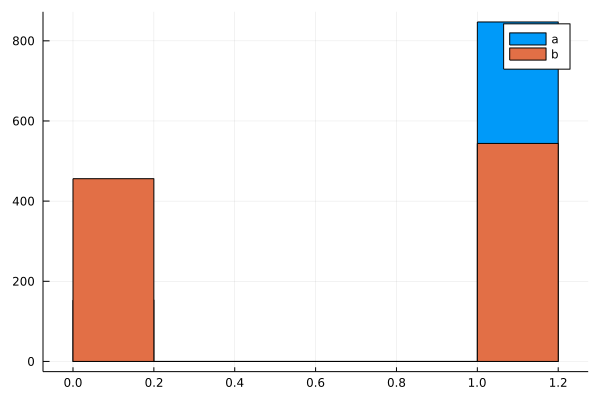

In [126]:
histogram(as, label="a")
histogram!(bs, label="b")


In [127]:
sum(as)/length(as)

0.847

In [128]:
sum(bs)/length(bs)

0.544

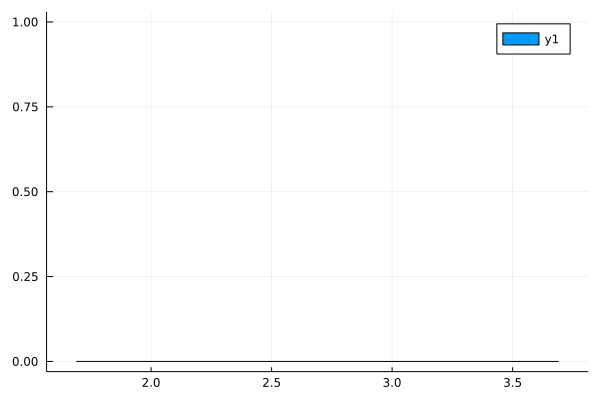

In [129]:
histogram(1 ./ (1 .+ exp.(.- ps)))

```javascript
var softHeads = Infer({ 
  model() {
    var a = flip(0.5);
    var b = flip(0.5);
    var c = flip(0.5);
    factor(a + b + c);
    return a;
  }
});
```

In [132]:
@gen function softHeads()
    a = @trace(bernoulli(0.5), :a)
    b = @trace(bernoulli(0.5), :b)
    c = @trace(bernoulli(0.5), :c)
    @trace(bernoulli(exp(a + b + c - 3)), :factor)
end;

In [137]:
get_choices(Gen.simulate(softHeads, ()))

│
├── :a : false
│
├── :b : true
│
├── :factor : true
│
└── :c : true


In [139]:
observations = Gen.choicemap()
observations[:factor] = 1
trace, = Gen.generate(softHeads, (), observations);

In [140]:
as = []
for i = 1:1000
    trace, = Gen.mh(trace, select(:a, :b, :c))
    push!(as, trace[:a])
end

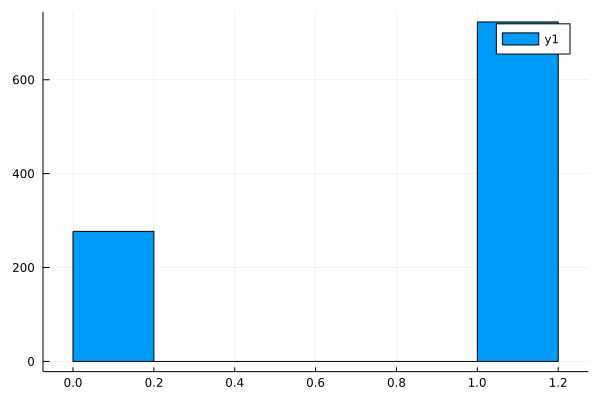

In [141]:
histogram(as)

In [142]:
sum(as)/length(as)

0.723